# Analyzing the Deals and Leads information of Olist store leads

## Table of Content
<ul>
    <li> <a href='#gather'> 1. Gather data </a></li>
        <ul> <a href='#prob'> 1.1 Problem Statement </a> </ul>
        <ul> <a href='#gather2'> 1.2 Gathering the datasets </a> </ul>
    <li> <a href='#assess'> 2. Data Wrangling </a></li>
    <li> <a href='#clean'> 3. Clean data </a> </li>
        <ul><a href='#clean1'> 3.1 cleaning deals data </a></ul>
        <ul><a href='#clean2'> 3.2 cleaning leads data </a></ul>
        <ul><a href='#clean3'> 3.3 Combine datasets</a></ul>
    <li> <a href='#update'> 4. Update the data store </a> </li>
    <li> <a href='#ans'> 5. Answer the research question </a> </li>
    <li> <a href='#fut'> 6. Future Work </a> </li>
<ul>

<a id='gather'></a>
## 1. Gather data

In [1]:
import pandas as pd
import requests
import os
import kaggle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<a id='prob'></a>
### **1.1.** Problem Statement
Analyzing the deals with leads at Olist store. To answer the question **does the leads of Olist store has big qualifications like copmanies and (GTIN) Global Trade Item Number?**

To answer this question I well get two data sets the first one **Olist closed deals datasets**, it contains the information about the deals, and the second dataset **Olist marketing qualified leads dataset**, it contains the information about the leads qualified to deal with Olist store.

Combining these datasets will help me do better analyzing and exploring of the deals and leads information.

<a id='gather2'></a>
### **1.2.** Gathering the datasets

### **Dataset 1**

- **Name:** Olist Closed Deals Dataset
- **Describtion:** The dataset contains the information of the deals with the leads, these information will help us analyzing the leads dealing with Olist.
- **Source:** [Kaggle](https://www.kaggle.com/datasets/olistbr/marketing-funnel-olist?select=olist_closed_deals_dataset.csv)
- **Type:** CSV File.
- **Method:** The data was gathered using the "Downloading files" method from Kaggle website.

### **Dataset variables:**

* *mql_id:* : Marketing Qualified Lead id.
* *seller_id:* Seller id.
* *sdr_id:* Sales Development Representative id.
* *sr_id"* Sales Representative
* *won_date:* Date the deal was closed.
* *business_segment:* Lead business segment. Informed on contact.
* *lead_type:* Lead type. Informed on contact.
* *lead_behaviour_profile:* Lead behaviour profile. SDR identify it on contact.
* *has_company:* Does the lead have a company (formal documentation)?
* *has_gtin:* Does the lead have Global Trade Item Number (barcode) for his products?
* *average_stock:* Lead declared average stock. Informed on contact.
* *business_type:* Type of business (reseller/manufacturer etc.)
* *declared_product_catalog_size:* Lead declared catalog size. Informed on contact.
* *declared_monthly_revenue:* Lead declared estimated monthly revenue. Informed on contact.

In [2]:
# Reading the first dataset and setting the first colom as the index

deals = pd.read_csv('olist_closed_deals_dataset.csv')

### **Dataset 2** 

- **Name:** olist marketing qualified leads dataset
- **Describtion:** The dataset contains the Marketing Qualified Leads (MQLs), the ones that are qualified to sell their products at Olist.
- **Source:** [Kaggle](https://www.kaggle.com/datasets/olistbr/marketing-funnel-olist?select=olist_marketing_qualified_leads_dataset.csv)
- **Type:** CSV File.
- **Method:** The data was gathered  via the Kaggle API.

### Dataset variables:

* *mql_id:* Marketing Qualified Lead id
* *first_contact_date:* Date of the first contact solicitation.
* *landing_page_id:* Landing page id where the lead was acquired
* *origin:* Type of media where the lead was acquired

In [3]:
# Get the dataset using API
dataset_id = 'olistbr/marketing-funnel-olist'
file_name = 'olist_marketing_qualified_leads_dataset.csv'

kaggle.api.dataset_download_file(dataset_id, file_name=file_name, path='.', force=True)

Dataset URL: https://www.kaggle.com/datasets/olistbr/marketing-funnel-olist


True

In [4]:
# Reading the second dataset and setting the first colom as the index

leads = pd.read_csv('olist_marketing_qualified_leads_dataset.csv')

<a id='assess'></a>
## 2. Assess data

### Quality Issue 1:

In [5]:
# Assessing the deals visually
deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [6]:
# Assessing the deals programatically
deals.describe()

,declared_product_catalog_size,declared_monthly_revenue
count,69.000000,8.420000e+02
mean,233.028986,7.337768e+04
std,352.380558,1.744799e+06
min,1.000000,0.000000e+00
25%,30.000000,0.000000e+00
50%,100.000000,0.000000e+00
75%,300.000000,0.000000e+00
max,2000.000000,5.000000e+07


In [7]:
# Assessing the deals programatically
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

#### Identify issues

- Issue 1 (Validity): All rows, column `won_date`. Number of ratings is being processed by pandas as a date, rather than a object.
- Issue 2 (Validity): All rows, column `has_company`. Number of reviews is being processed by pandas as a bool, rather than a object.
- Issue 3 (Validity): All rows, column `has_gtin`. Number of reviews is being processed by pandas as a bool, rather than a object.

### Quality Issue 2:

In [8]:
# Assessing the leads visually
leads.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [9]:
# Assessing the leads programatically
leads.describe()

,mql_id,first_contact_date,landing_page_id,origin
count,8000,8000,8000,7940
unique,8000,336,495,10
top,dac32acd4db4c29c230538b72f8dd87d,2018-05-02,b76ef37428e6799c421989521c0e5077,organic_search
freq,1,93,912,2296


In [10]:
# Assessing the leads programatically
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


#### Identify issues

- Issue 1 (Validity): All rows, column `first_contact_date	`. Number of ratings is being processed by pandas as a date, rather than a object.

### Tidiness Issue :

In [11]:
# Assessing the deals visually
deals.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [12]:
# Assessing the deals programatically
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

In [13]:
# Checking the values of has_company column
deals.has_company.value_counts()

has_company
True     58
False     5
Name: count, dtype: int64

In [14]:
# Checking the values of has_gtin column
deals.has_gtin.value_counts()

has_gtin
True     54
False    10
Name: count, dtype: int64

### Identify issues

- Issue 1 (Structural): the column `won_date` violate the first rule of tidiness: that each variable forms a column.
- Issue 2 : the column `has_company` and `has_gtin`, contains many null values.

In [15]:
# Assessing the leads visually
leads.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [16]:
# Assessing the leads programatically
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


<a id='clean'></a>
## 3. Clean data

<a id='clean1'></a>
### 3.1 cleaning deals data

In [17]:
# Making a copy of the original data
cleaned_deals = deals.copy()

In [18]:
#Filter the dataframe to the specific data elements
cleaned_deals = deals[['mql_id', 'business_segment', 'lead_type', 'won_date', 'has_company', 'has_gtin', 'business_type']]

In [19]:
cleaned_deals.head()

,mql_id,business_segment,lead_type,won_date,has_company,has_gtin,business_type
0,5420aad7fec3549a85876ba1c529bd84,pet,online_medium,2018-02-26 19:58:54,NaN,NaN,reseller
1,a555fb36b9368110ede0f043dfc3b9a0,car_accessories,industry,2018-05-08 20:17:59,NaN,NaN,reseller
2,327174d3648a2d047e8940d7d15204ca,home_appliances,online_big,2018-06-05 17:27:23,NaN,NaN,reseller
3,f5fee8f7da74f4887f5bcae2bafb6dd6,food_drink,online_small,2018-01-17 13:51:03,NaN,NaN,reseller
4,ffe640179b554e295c167a2f6be528e0,home_appliances,industry,2018-07-03 20:17:45,NaN,NaN,manufacturer


In [20]:
cleaned_deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mql_id            842 non-null    object
 1   business_segment  841 non-null    object
 2   lead_type         836 non-null    object
 3   won_date          842 non-null    object
 4   has_company       63 non-null     object
 5   has_gtin          64 non-null     object
 6   business_type     832 non-null    object
dtypes: object(7)
memory usage: 46.2+ KB


The null values at `has_company` means the the lead has no company to in should be set as `False`

In [21]:
# Setting NaN values as false at has_company column
cleaned_deals['has_company'] = cleaned_deals['has_company'].fillna(False)

# Setting NaN values as false at has_gtin column
cleaned_deals['has_gtin'] = cleaned_deals['has_gtin'].fillna(False)

In [22]:
# Setting the type of `has_company` into bool
cleaned_deals['has_company'] = cleaned_deals['has_company'].astype(bool)
cleaned_deals['has_gtin'] = cleaned_deals['has_gtin'].astype(bool)

# setting the value of the `won_date` into date only and setting the dtype into datetime
cleaned_deals['won_date'] = pd.to_datetime(cleaned_deals['won_date']).dt.date
cleaned_deals['won_date'] = pd.to_datetime(cleaned_deals['won_date'])

In [23]:
# Making sure that the nan values set into false
cleaned_deals['has_company'].value_counts()

has_company
False    784
True      58
Name: count, dtype: int64

In [24]:
# The column `lead_type` contains null values so we will drop rows with null values
cleaned_deals = cleaned_deals.dropna()

In [25]:
# Checking if the codes worked well or not
cleaned_deals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 841
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   mql_id            825 non-null    object        
 1   business_segment  825 non-null    object        
 2   lead_type         825 non-null    object        
 3   won_date          825 non-null    datetime64[ns]
 4   has_company       825 non-null    bool          
 5   has_gtin          825 non-null    bool          
 6   business_type     825 non-null    object        
dtypes: bool(2), datetime64[ns](1), object(4)
memory usage: 40.3+ KB


<a id='clean2'></a>
### 3.2 cleaning leads data

In [26]:
# Making a copy od leads dataframe
cleaned_leads = leads.copy()

In [27]:
# Cheking it visualy
cleaned_leads.head()

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [28]:
cleaned_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [29]:
# Setting the data type of the `first_contact_date` into date
cleaned_leads['first_contact_date'] = pd.to_datetime(cleaned_leads['first_contact_date'])

In [30]:
# Making sure the code worked well
cleaned_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              7940 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


In [31]:
# Dropping null values
cleaned_leads = cleaned_leads.dropna()

cleaned_leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7940 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              7940 non-null   object        
 1   first_contact_date  7940 non-null   datetime64[ns]
 2   landing_page_id     7940 non-null   object        
 3   origin              7940 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 310.2+ KB


<a id='clean3'></a>
### 3.3 **Combine datasets**

In [32]:
merged_df = pd.merge(cleaned_deals, cleaned_leads, on=['mql_id'], how='left')

merged_df

,mql_id,business_segment,lead_type,won_date,has_company,has_gtin,business_type,first_contact_date,landing_page_id,origin
0,5420aad7fec3549a85876ba1c529bd84,pet,online_medium,2018-02-26,False,False,reseller,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
1,a555fb36b9368110ede0f043dfc3b9a0,car_accessories,industry,2018-05-08,False,False,reseller,2018-04-04,2f08471dfb83baef522f952438a36f6e,referral
2,327174d3648a2d047e8940d7d15204ca,home_appliances,online_big,2018-06-05,False,False,reseller,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search
3,f5fee8f7da74f4887f5bcae2bafb6dd6,food_drink,online_small,2018-01-17,False,False,reseller,2018-01-14,22c29808c4f815213303f8933030604c,paid_search
4,ffe640179b554e295c167a2f6be528e0,home_appliances,industry,2018-07-03,False,False,manufacturer,2017-10-09,a0fbc0263cb98bdb0d72b9f9f283a172,unknown
...,...,...,...,...,...,...,...,...,...,...
820,df9a2abe2ad3f2d8758b675ac8331ecf,home_decor,offline,2018-08-01,False,False,reseller,2018-03-28,a7982125ff7aa3b2054c6e44f9d28522,organic_search
821,8723201570415eb23b4f095d8c20a27c,construction_tools_house_garden,online_big,2018-09-27,False,False,reseller,2018-05-18,b76ef37428e6799c421989521c0e5077,organic_search
822,2e57665b8faf05c967a801eb5aedfa0a,computers,online_medium,2018-06-06,False,False,reseller,2018-05-25,40dec9f3d5259a3d2dbcdab2114fae47,paid_search
823,40955be51cc85c5a5a6cdd12b19e9f10,pet,online_beginner,2018-03-06,False,False,reseller,2018-02-04,88740e65d5d6b056e0cda098e1ea6313,social


<a id='update'></a>
## 4. Update the data store

In [33]:
# Saving raw data
leads.to_csv('raw_leads.csv', index=False, encoding="utf-8")

In [34]:
# Saving cleaned data
cleaned_deals.to_csv('deals_cleaned.csv', index=False, encoding="utf-8")
cleaned_leads.to_csv('leads_cleaned.csv', index=False, encoding="utf-8")

In [35]:
# Saving the new dataframe into csv file
merged_df.to_csv('deals_and_leads_cleaned.csv', index=False, encoding="utf-8")

<a id='ans'></a>
## 5. Answer the research question

### Q: does the leads of Olist store has big qualifications like copmanies and (GTIN) Global Trade Item Number?

To answer this question we need to count how many leads have companies and GTIN, how many true are there in these columns

In [36]:
new_df = merged_df[(merged_df.has_company == True) | (merged_df.has_gtin == True)][['mql_id', 'has_company', 'has_gtin']]

new_df.shape

(63, 3)

**Answer** there is only 63 lead has a company or a GTIN and this is a very small number comparing to the number of all leads.

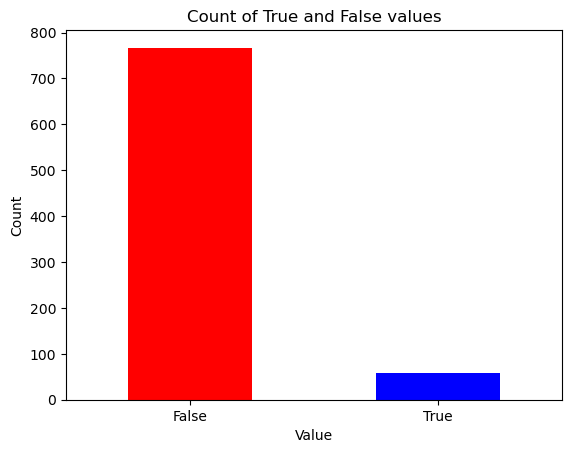

In [37]:
bool_counts = merged_df['has_company'].value_counts()

# Plotting
bool_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Count of True and False values')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

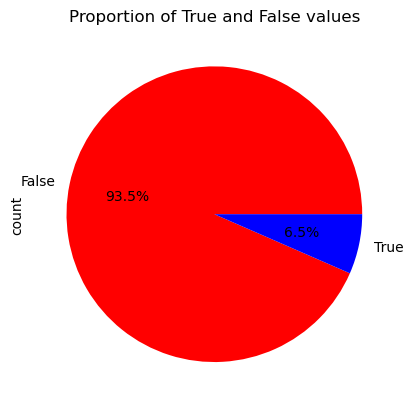

In [38]:
bool_counts = merged_df['has_gtin'].value_counts()

# Plotting
bool_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue'])
plt.title('Proportion of True and False values')
plt.show()

these plots shows how it's very small part of the leads having companies and GTINs.

<a id='fut'></a>
### 6. Future Work

If I had more time to explore these data sets i will estimate the time the Olist store takes to close the deal with the lead, by estimating the time taken from the `first_contact_date` column to the `won_date` column, i would also explore the business types of the leads.